In [3]:
!pip install dgl -f https://data.dgl.ai/wheels/cu118/repo.html
import dgl
from dgl import function as fn
from dgl.dataloading import DataLoader


Looking in links: https://data.dgl.ai/wheels/cu118/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 3.5 MB/s eta 0:00:00a 0:00:01m
Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


DGL backend not selected or invalid.  Assuming PyTorch for now.


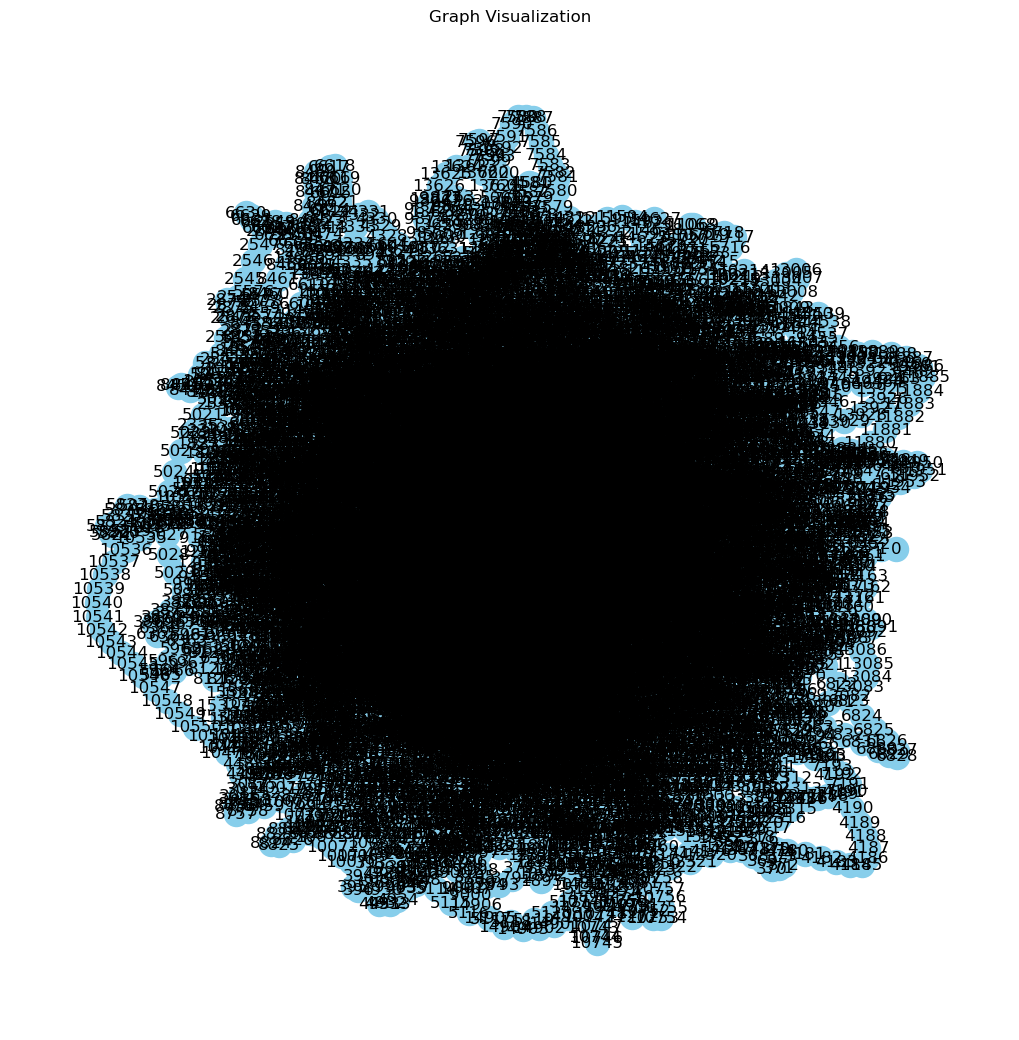

In [7]:
import pandas as pd
import numpy as np
import torch
import dgl
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/Users/prathamranjan/Downloads/oracle_cleaned (1).csv')

# Assuming each row in your dataset represents an entity that should be a node in the graph
# Example: Each row is an individual/entity with its unique identifier

# Step 1: Define Nodes
# Here, we use the DataFrame index as a simple way to assign node IDs
node_ids = df.index.to_list()

from sklearn.preprocessing import OneHotEncoder

# Assuming 'Feature1', 'Feature2' are categorical features that you want to one-hot encode,
# and 'Feature3' is a numerical feature that you want to standardize.
# Adjust these feature names based on your dataset.
categorical_features = ['Make', 'AccidentArea', 'VehicleCategory', 'Sex', 'Fault', 'PolicyType']
numerical_features = ['AgeOfVehicle', 'Deductible', 'VehiclePrice', 'Age']

# One-hot encode the categorical features
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded_features = onehot_encoder.fit_transform(df[categorical_features].fillna('Missing'))

# Standardize the numerical features
scaler = StandardScaler()
standardized_numerical_features = scaler.fit_transform(df[numerical_features].fillna(0))

# Combine one-hot encoded and standardized features
combined_features = np.concatenate([onehot_encoded_features, standardized_numerical_features], axis=1)

# Convert to tensor
node_features_tensor = torch.tensor(combined_features, dtype=torch.float)

# Step 3: Define Edges
# For simplicity, let's assume each node is connected to its next, illustrating a sequential relationship.
# In a real scenario, this should be based on your data's actual relationships.
edges_src = node_ids[:-1]  # Source nodes
edges_dst = node_ids[1:]   # Destination nodes

# Convert source and destination lists into tensors
edges_src_tensor = torch.tensor(edges_src, dtype=torch.long)
edges_dst_tensor = torch.tensor(edges_dst, dtype=torch.long)


# Step 5: Create the DGL Graph
g = dgl.graph((edges_src_tensor, edges_dst_tensor))
g.ndata['feat'] = node_features_tensor  # Assign node features

# Visualization
# Convert DGL graph to NetworkX for visualization
nx_g = g.to_networkx().to_undirected()

# Draw the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(nx_g)
nx.draw(nx_g, pos, with_labels=True, node_color='skyblue', edge_color='k')
plt.title('Graph Visualization')
plt.show()


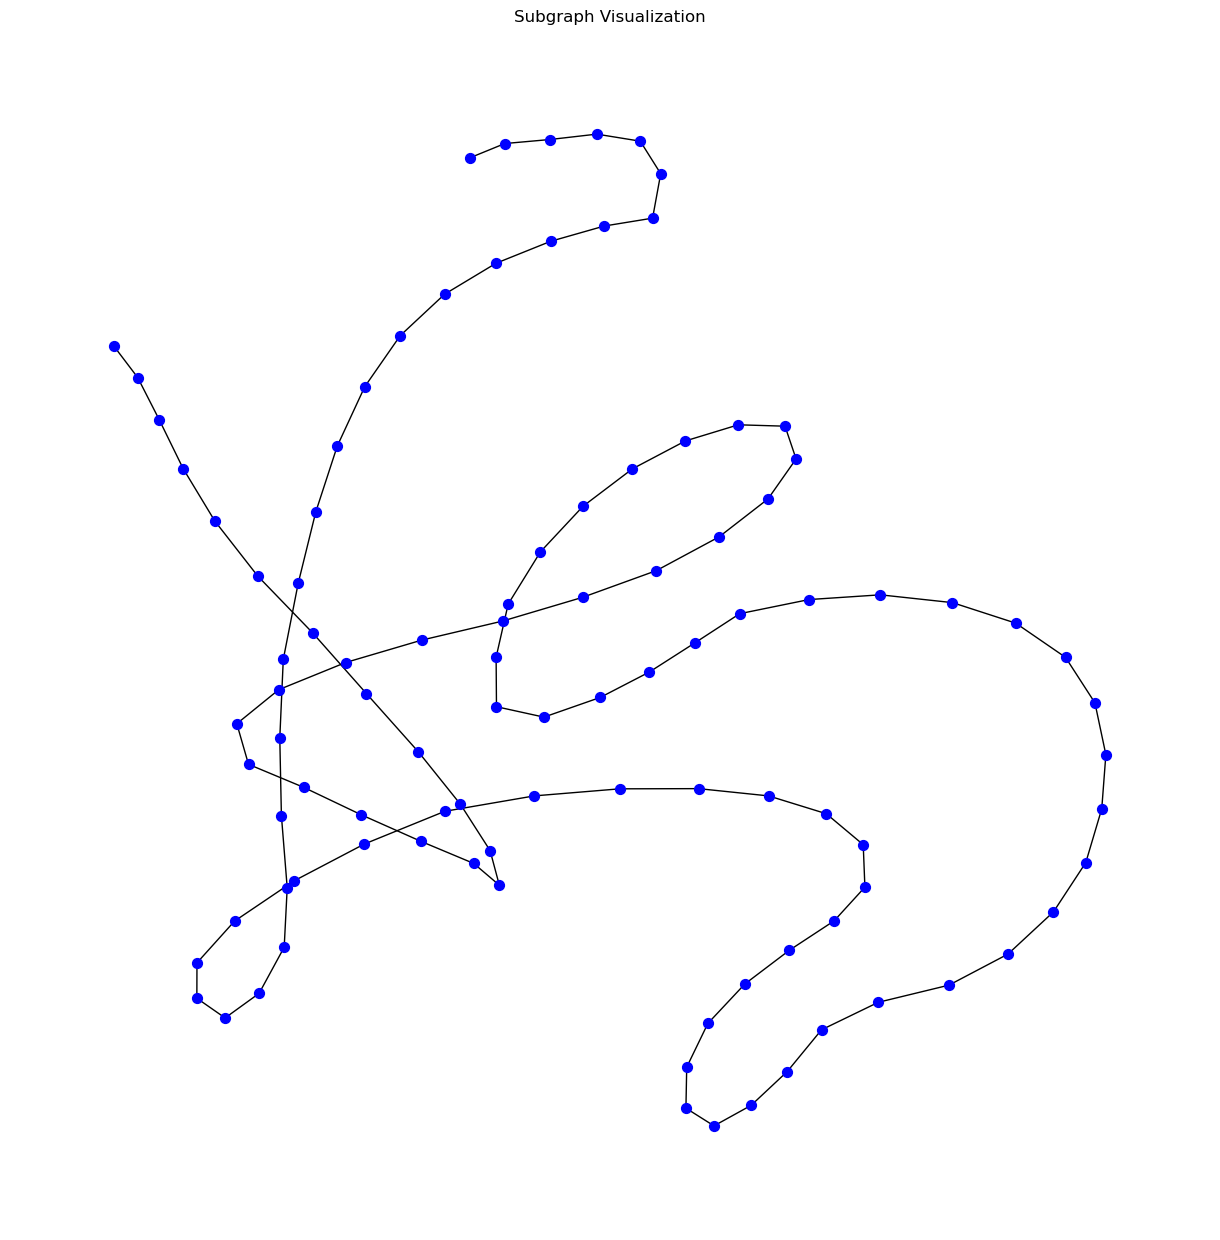

In [10]:
import pandas as pd
import numpy as np
import torch
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from itertools import combinations
import dgl
import networkx as nx
import matplotlib.pyplot as plt

import networkx as nx
import matplotlib.pyplot as plt

def plot_dgl_graph(g, title="Graph Visualization"):
    # Convert DGL graph to NetworkX for visualization
    nx_g = g.to_networkx().to_undirected()
    pos = nx.spring_layout(nx_g)
    plt.figure(figsize=(12, 12))
    nx.draw(nx_g, pos, node_size=50, node_color="blue", with_labels=False)
    plt.title(title)
    plt.show()
sub_g = dgl.node_subgraph(g, list(range(100)))  # Adjust the range as needed
plot_dgl_graph(sub_g, "Subgraph Visualization")

In [11]:
import dgl

# Assuming 'g' is your DGL Graph

# Number of nodes
num_nodes = g.number_of_nodes()
print(f"Number of nodes: {num_nodes}")

# Number of edges
num_edges = g.number_of_edges()
print(f"Number of edges: {num_edges}")

# For each node, you can get its degree (number of connections) as follows:
degrees = g.in_degrees().numpy()  # For directed graphs, consider g.out_degrees() as well
print("Degrees of all nodes:", degrees)


Number of nodes: 15419
Number of edges: 15418
Degrees of all nodes: [0 1 1 ... 1 1 1]


Number of nodes: 15419
Number of edges: 15418
Degrees of all nodes: {0: 1, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2, 23: 2, 24: 2, 25: 2, 26: 2, 27: 2, 28: 2, 29: 2, 30: 2, 31: 2, 32: 2, 33: 2, 34: 2, 35: 2, 36: 2, 37: 2, 38: 2, 39: 2, 40: 2, 41: 2, 42: 2, 43: 2, 44: 2, 45: 2, 46: 2, 47: 2, 48: 2, 49: 2, 50: 2, 51: 2, 52: 2, 53: 2, 54: 2, 55: 2, 56: 2, 57: 2, 58: 2, 59: 2, 60: 2, 61: 2, 62: 2, 63: 2, 64: 2, 65: 2, 66: 2, 67: 2, 68: 2, 69: 2, 70: 2, 71: 2, 72: 2, 73: 2, 74: 2, 75: 2, 76: 2, 77: 2, 78: 2, 79: 2, 80: 2, 81: 2, 82: 2, 83: 2, 84: 2, 85: 2, 86: 2, 87: 2, 88: 2, 89: 2, 90: 2, 91: 2, 92: 2, 93: 2, 94: 2, 95: 2, 96: 2, 97: 2, 98: 2, 99: 2, 100: 2, 101: 2, 102: 2, 103: 2, 104: 2, 105: 2, 106: 2, 107: 2, 108: 2, 109: 2, 110: 2, 111: 2, 112: 2, 113: 2, 114: 2, 115: 2, 116: 2, 117: 2, 118: 2, 119: 2, 120: 2, 121: 2, 122: 2, 123: 2, 124: 2, 125: 2, 126: 2, 127: 2, 128: 2, 129: 2, 1

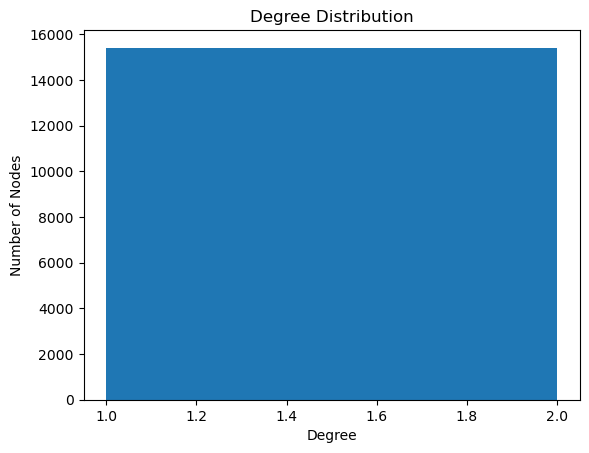

Number of connected components: 1
Size of the largest component: 15419


In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# Convert DGL graph to NetworkX graph
nx_g = g.to_networkx().to_undirected()

# Basic information
print(f"Number of nodes: {nx_g.number_of_nodes()}")
print(f"Number of edges: {nx_g.number_of_edges()}")

# Degree distribution (number of connections per node)
degrees = dict(nx_g.degree())
print("Degrees of all nodes:", degrees)

# Plot degree distribution
plt.hist(degrees.values(), bins=range(1, max(degrees.values()) + 1))
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.show()

# Analyze components
components = list(nx.connected_components(nx_g))
print(f"Number of connected components: {len(components)}")
largest_component = max(components, key=len)
print(f"Size of the largest component: {len(largest_component)}")


In [13]:
import dgl.nn as dglnn
import torch.nn as nn
import torch.nn.functional as F

class GNNModel(nn.Module):
    def __init__(self, in_feats, h_feats, num_classes):
        super(GNNModel, self).__init__()
        self.conv1 = dglnn.GraphConv(in_feats, h_feats)
        self.conv2 = dglnn.GraphConv(h_feats, num_classes)

    def forward(self, g, in_feat):
        h = self.conv1(g, in_feat)
        h = F.relu(h)
        h = self.conv2(g, h)
        return h


In [14]:
# Assuming labels are in your DataFrame
labels = torch.tensor(df['FraudFound_P'].values, dtype=torch.long)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

train_mask, test_mask = train_test_split(range(len(labels)), test_size=0.2, random_state=42)
train_mask = torch.tensor(train_mask, dtype=torch.bool)
test_mask = torch.tensor(test_mask, dtype=torch.bool)


In [15]:
from torch.optim import Adam

# Assuming your node features and labels are already defined
num_features = node_features_tensor.shape[1]
num_classes = 2  # Fraud or Not Fraud

model = GNNModel(in_feats=num_features, h_feats=16, num_classes=num_classes)
loss_func = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(50):
    model.train()
    logits = model(g, node_features_tensor)
    loss = loss_func(logits[train_mask], labels[train_mask])

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 5 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')


DGLError: There are 0-in-degree nodes in the graph, output for those nodes will be invalid. This is harmful for some applications, causing silent performance regression. Adding self-loop on the input graph by calling `g = dgl.add_self_loop(g)` will resolve the issue. Setting ``allow_zero_in_degree`` to be `True` when constructing this module will suppress the check and let the code run.

In [ ]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score

model.eval()
with torch.no_grad():
    test_logits = model(g, node_features_tensor)[test_mask]
    test_pred = test_logits.argmax(dim=1)
    test_labels = labels[test_mask]

    # Calculate metrics
    precision = precision_score(test_labels.numpy(), test_pred.numpy())
    recall = recall_score(test_labels.numpy(), test_pred.numpy())
    roc_auc = roc_auc_score(test_labels.numpy(), test_logits.numpy()[:, 1])
    accuracy = accuracy_score(test_labels.numpy(), test_pred.numpy())

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'ROC-AUC: {roc_auc}')
print(f'Accuracy: {accuracy}')


In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Convert logits to probabilities
test_probs = torch.softmax(test_logits, dim=1)[:, 1].numpy()
test_labels = labels[test_mask].numpy()

# Calculate precision-recall pairs for different probability thresholds
precision, recall, thresholds = precision_recall_curve(test_labels, test_probs)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='GNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()
